In [1]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the dataset
df = pd.read_csv(r"C:\Users\ruaru\Desktop\COPPER.csv")
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.0


## DATA UNDERSTANDING

In [4]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [5]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [6]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [8]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [9]:
# IDENTIFING THE NUMBER OF UNIQUE VALUES

print(len(df["item_date"].unique()))
print(len(df["customer"].unique()))
print(len(df["material_ref"].unique()))
print(len(df["product_ref"].unique()))
print(len(df["delivery date"].unique()))

253
1170
16564
33
29


In [10]:
# DATA FORMATTING

df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [11]:
dfc = df.copy()

In [12]:
# TREATING THE NULL VALUES

dfc["material_ref"].fillna("unknown",inplace = True)
dfc = dfc.dropna()
print(dfc.isnull().sum())
print(dfc.shape)

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64
(181631, 14)


## EDA
#### BEFORE TREATING OUTLIERS AND SKEWNESS

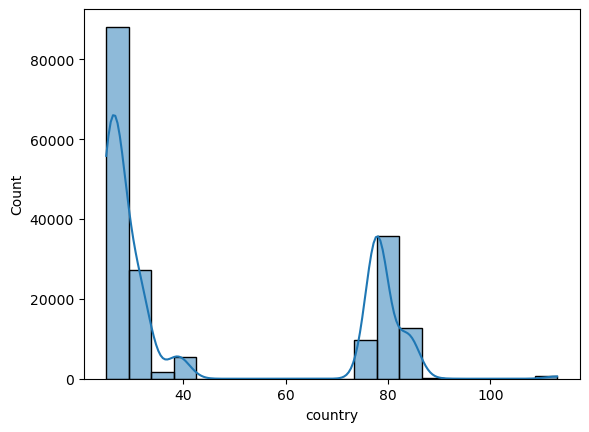

In [14]:
sns.histplot(dfc['country'], bins=20, kde=True)
plt.show()

<Axes: xlabel='width', ylabel='Count'>

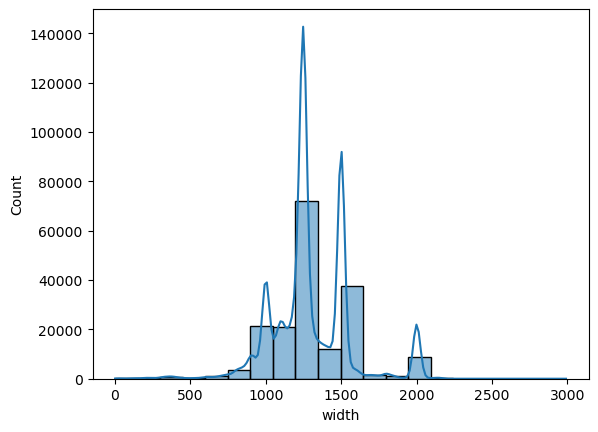

In [15]:
sns.histplot(dfc['width'], bins=20, kde=True)

<Axes: xlabel='thickness', ylabel='Count'>

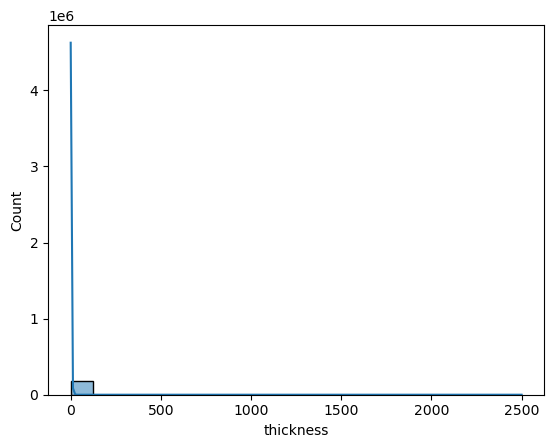

In [16]:
sns.histplot(dfc['thickness'], bins=20, kde=True)

In [17]:
a = dfc['selling_price'] <= 0
print(a.sum())
dfc.loc[a, 'selling_price'] = np.nan

a = dfc['quantity tons'] <= 0
print(a.sum())
dfc.loc[a, 'quantity tons'] = np.nan

a = dfc['thickness'] <= 0
print(a.sum())

7
4
0


In [18]:
dfc.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

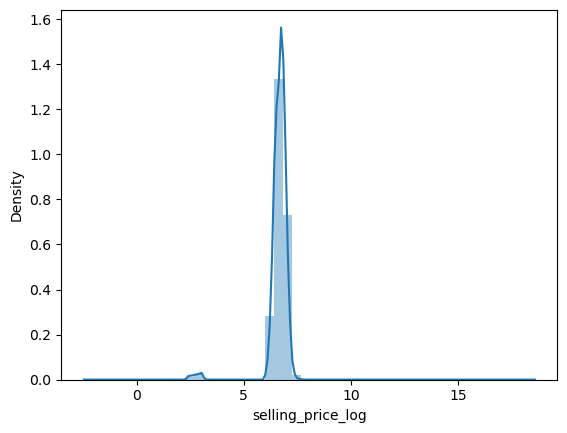

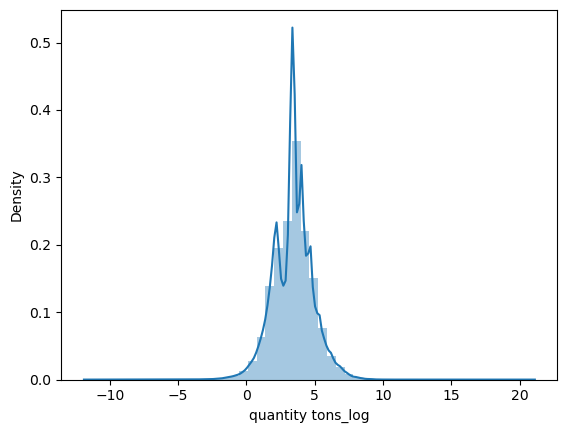

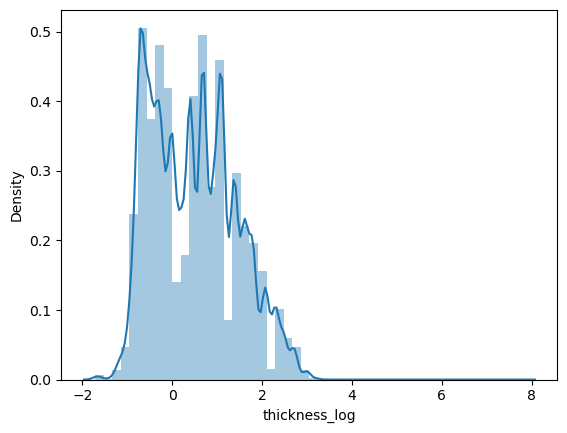

In [19]:
dfc['selling_price_log'] = np.log(dfc['selling_price'])
sns.distplot(dfc['selling_price_log'])
plt.show()

dfc['quantity tons_log'] = np.log(dfc['quantity tons'])
sns.distplot(dfc['quantity tons_log'])
plt.show()

dfc['thickness_log'] = np.log(dfc['thickness'])
sns.distplot(dfc['thickness_log'])
plt.show()

In [20]:
#use ordinal encoder to convert categorical data into numerical data.
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
dfc.status = OE.fit_transform(dfc[['status']])
dfc['item type'] = OE.fit_transform(dfc[['item type']])

In [21]:
dfc = dfc.dropna()

In [22]:
dfc.isnull().sum()

id                   0
item_date            0
quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref         0
product_ref          0
delivery date        0
selling_price        0
selling_price_log    0
quantity tons_log    0
thickness_log        0
dtype: int64

### REGRESSION MODEL

In [24]:
#split data into X, y
X=dfc[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=dfc['selling_price_log']

In [25]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit_transform(X)

array([[ 0.41506739,  0.70620108,  0.82144631, ..., -0.69225033,
        -0.75771563,  1.66790511],
       [ 2.25042993,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.29403459,  1.66498251],
       [ 1.77453529,  0.70620108,  1.76911846, ..., -0.61029817,
        -0.78103392, -0.65974878],
       ...,
       [ 1.34669579,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654],
       [-1.34846834,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654],
       [ 1.81043496,  0.70620108,  0.82144631, ..., -0.81517858,
        -0.31475754, -0.43186654]])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127134, 9)
(54486, 9)
(127134,)
(54486,)


In [27]:
#import regression algorithm.
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.08464529095644657
0.07805457009447858


In [29]:
rf = RandomForestRegressor(n_estimators = 20, max_depth = 4, random_state = 42)
rf.fit(X_train, y_train)
print(rf.score(X_train, y_train))
print(rf.score(X_test,y_test))

0.8736436626286413
0.8867180545575358


In [30]:
gbr = GradientBoostingRegressor(n_estimators = 10, learning_rate = 0.1, random_state =42)
gbr.fit(X_train,y_train)
print(gbr.score(X_train,y_train))
print(gbr.score(X_test,y_test))

0.7627437653996635
0.7738696934709421


In [31]:
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Best hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2}


In [32]:
#check metrics
from sklearn import metrics

In [33]:
#check MSE
metrics.mean_squared_error(y_test,y_pred)

0.026523904600659315

In [34]:
#check MAE
metrics.mean_absolute_error(y_test, y_pred)

0.12471154735153415

In [35]:
#R2 Score
print(metrics.r2_score(y_test,y_pred))

0.9181521488275709


### CLASSIFICATION MODELS

In [37]:
df.status.value_counts()

status
Won                116010
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [38]:
dfr = df.copy()

In [39]:
dfr = df[df['status'].isin(['Won', 'Lost'])]
len(dfc)

181620

In [40]:
dfr = dfr.dropna()

In [41]:
dfr.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [42]:
dfr.status.value_counts()

status
Won     74727
Lost    12920
Name: count, dtype: int64

In [43]:
#use ordinal encoder to convert categorical data into numerical data
OE = OrdinalEncoder()
dfr.status = OE.fit_transform(dfr[['status']])
dfr['item type'] = OE.fit_transform(dfr[['item type']])

In [44]:
#split data into X, y
X = dfr[['quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref']]
y = dfr['status']

In [45]:
#apply standard scaler
SS.fit_transform(X)

array([[-0.08776061,  0.1002334 ,  0.62550583, ..., -0.68094425,
        -1.0511256 ,  1.78249663],
       [ 1.31783313,  0.66844406,  0.62550583, ..., -0.80460483,
        -0.36097564,  1.77947978],
       [ 0.56589076, -0.51705536,  2.26169257, ..., -0.59850386,
        -1.0858329 , -0.62022606],
       ...,
       [-0.18604267, -0.59162933,  0.62550583, ..., -0.80460483,
        -0.39182   , -0.38499443],
       [-4.13231638, -0.64462307,  0.62550583, ..., -0.80460483,
        -0.39182   , -0.38499443],
       [ 0.60636995, -0.62695849,  0.62550583, ..., -0.80460483,
        -0.39182   , -0.38499443]])

In [46]:
#split data into train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(61352, 9)
(26295, 9)
(61352,)
(26295,)


In [47]:
#import classifier algorithms.
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [48]:
dtc = DecisionTreeClassifier(max_depth = 5, random_state = 1)
dtc.fit(X_train, y_train)
train_score = dtc.score(X_train, y_train)
test_score = dtc.score(X_test, y_test)
print(train_score)
print(test_score)

0.8740383361585604
0.8727895037079293


In [49]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9420230799321946
0.9143563415097927


In [50]:
gbc = GradientBoostingClassifier(n_estimators = 30, learning_rate = 0.1,random_state = 28)
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
print(gbc.score(X_test, y_test))

0.8736145520928413
0.8744247955885149


In [51]:
rfc = RandomForestClassifier(n_estimators = 20, max_depth =6,random_state = 35)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.8760105620028686
0.8762882677315079


In [52]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
print(LR.score(X_train, y_train))
print(LR.score(X_test, y_test))

0.8527676359368888
0.852177220003803


In [53]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)
xgb_model.fit(X_train, y_train)
xgb_model.score(X_train, y_train)

0.6730325254753191

In [54]:
y_predict = xgb_model.predict(X_test)
print(y_predict)

[0.91536766 0.9480907  0.8536547  ... 0.9738863  0.32597667 1.0063082 ]


In [55]:
mean_squared_error(y_test, y_predict)

0.052990344918894934

In [56]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=20, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

1.0
0.9441338657539456
